In [1]:
getwd()

[1] "/content"

In [2]:
install.packages("rdwd")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘abind’, ‘berryFunctions’, ‘pbapply’




In [3]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’




In [5]:
install.packages("raster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’




In [6]:
install.packages("berryFunctions")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(rdwd)
library(tidyverse)
library(sf)
library(raster)
library(berryFunctions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package

[1] "Cottbus"

,Stationsname,geoLaenge,geoBreite
,<chr>,<dbl>,<dbl>
19488,Cottbus,14.3168,51.7759


[1] "Dahme-Spreewald"

,Stationsname,geoLaenge,geoBreite
,<chr>,<dbl>,<dbl>
9611,Berlin Brandenburg,13.5306,52.3807
65580,Luebben-Blumenfelde,13.8797,51.9267


[1] "Elbe-Elster"

,Stationsname,geoLaenge,geoBreite
,<chr>,<dbl>,<dbl>
22229,Doberlug-Kirchhain,13.5747,51.6451
49016,Holzdorf (Flugplatz),13.1666,51.7657


[1] "Oberspreewald-Lausitz"

,Stationsname,geoLaenge,geoBreite
,<chr>,<dbl>,<dbl>
55835,Schipkau-Klettwitz,13.8845,51.5554


[1] "Spree-Neiße"

Stationsname,geoLaenge,geoBreite
<chr>,<dbl>,<dbl>


[1] "Bautzen"

,Stationsname,geoLaenge,geoBreite
,<chr>,<dbl>,<dbl>
141676,Grosspostwitz-Denkwitz,14.4343,51.1348
132790,Hoyerswerda,14.2533,51.4492
6926,"Kubschuetz, Kr. Bautzen",14.5042,51.1604
125457,Sohland/Spree,14.4266,51.0594


[1] "Görlitz"

,Stationsname,geoLaenge,geoBreite
,<chr>,<dbl>,<dbl>
47649,Bertsdorf-Hoernitz,14.7456,50.8992
36743,Goerlitz,14.9506,51.1621
73580,"Muskau, Bad",14.7008,51.5660


,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland,res,var,per,hasfile
,<int>,<date>,<date>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
19488,880,1887-01-01,2023-06-15,69,51.7759,14.3168,Cottbus,Brandenburg,daily,kl,recent,TRUE
9611,427,1957-01-01,2023-06-15,46,52.3807,13.5306,Berlin Brandenburg,Brandenburg,daily,kl,recent,TRUE
65580,3083,1991-10-01,2023-06-15,57,51.9267,13.8797,Luebben-Blumenfelde,Brandenburg,daily,kl,recent,TRUE
22229,1001,1948-07-01,2023-06-15,97,51.6451,13.5747,Doberlug-Kirchhain,Brandenburg,daily,kl,recent,TRUE
49016,2315,2000-06-01,2023-06-15,80,51.7657,13.1666,Holzdorf (Flugplatz),Brandenburg,daily,kl,recent,TRUE
55835,2627,1996-07-01,2023-06-15,128,51.5554,13.8845,Schipkau-Klettwitz,Brandenburg,daily,kl,recent,TRUE


[1] "Cottbus"                 "Berlin Brandenburg"     
 [3] "Luebben-Blumenfelde"     "Doberlug-Kirchhain"     
 [5] "Holzdorf (Flugplatz)"    "Schipkau-Klettwitz"     
 [7] "Grosspostwitz-Denkwitz"  "Hoyerswerda"            
 [9] "Kubschuetz, Kr. Bautzen" "Sohland/Spree"          
[11] "Bertsdorf-Hoernitz"      "Goerlitz"               
[13] "Muskau, Bad"

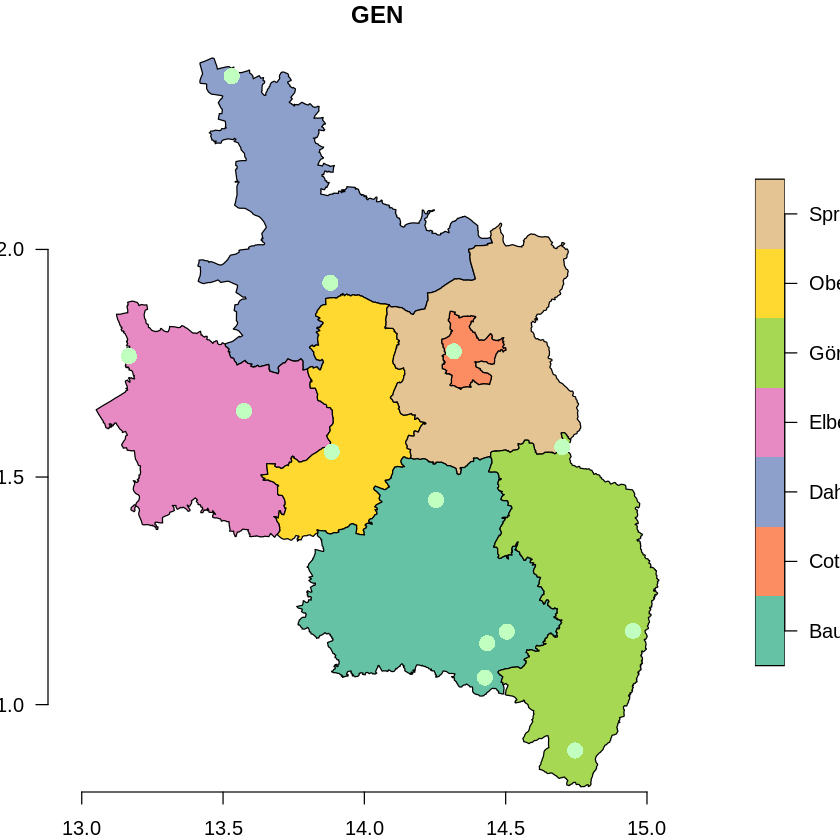

In [11]:

# Select daily climate data:
data("metaIndex") ; m <- metaIndex
m <- m[m$res=="daily" & m$var=="kl" & m$per=="recent" & m$hasfile, ]

# Transform into spatial object:
msf <- sf::st_as_sf(m, coords=c("geoLaenge", "geoBreite"), crs=4326)

# Read district shapefile, see link above:
lk <- sf::st_read("Lusatia_Administrative_Boundary_geom_info.shp", quiet=TRUE)

# intersections: list with msf rownumbers for each district:
lk = st_transform(lk, crs = st_crs(msf))
int <- sf::st_intersects(lk, msf)

# plot to check projection:
plot(lk[,"GEN"], reset=FALSE)
axis(1, line=-1); axis(2, line=-1, las=1)

# Cottbus
lk$GEN[[1]]
m[int[[1]], c("Stationsname", "geoLaenge", "geoBreite")]
points(m[int[[1]], c("geoLaenge", "geoBreite")], pch=16, col= "darkseagreen1", cex=1.8)

# Dahme-Spreewald
lk$GEN[[2]]
m[int[[2]], c("Stationsname", "geoLaenge", "geoBreite")]
points(m[int[[2]], c("geoLaenge", "geoBreite")], pch=16, col= "darkseagreen1", cex=1.8)

# Elbe-Elster
lk$GEN[[3]]
m[int[[3]], c("Stationsname", "geoLaenge", "geoBreite")]
points(m[int[[3]], c("geoLaenge", "geoBreite")], pch=16, col= "darkseagreen1", cex=1.8)

# Oberspreewald-Lausitz
lk$GEN[[4]]
m[int[[4]], c("Stationsname", "geoLaenge", "geoBreite")]
points(m[int[[4]], c("geoLaenge", "geoBreite")], pch=16, col= "darkseagreen1", cex=1.8)

# Spree-Nei?e
lk$GEN[[5]]
m[int[[5]], c("Stationsname", "geoLaenge", "geoBreite")]
points(m[int[[5]], c("geoLaenge", "geoBreite")], pch=16, col= "darkseagreen1", cex=1.8)

# Bautzen
lk$GEN[[6]]
m[int[[6]], c("Stationsname", "geoLaenge", "geoBreite")]
points(m[int[[6]], c("geoLaenge", "geoBreite")], pch=16, col= "darkseagreen1", cex=1.8)

# G?rlitz
lk$GEN[[7]]
m[int[[7]], c("Stationsname", "geoLaenge", "geoBreite")]
points(m[int[[7]], c("geoLaenge", "geoBreite")], pch=16, col= "darkseagreen1", cex=1.8)

# Lausitz
lausitz = c(int[[1]], int[[2]], int[[3]], int[[4]], int[[5]], int[[6]], int[[7]])
lausitz_stations = m[lausitz,]
head(lausitz_stations)
lausitz_stations$Stationsname
